<a href="https://colab.research.google.com/github/arcweld/DSI_Capstone_3/blob/main/notebooks/4_1_smw_prod_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
from google.colab import drive

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!ls src/data/

make_dataset.py  __pycache__


In [16]:
from src.data import make_dataset
# from src.data.make_dataset import fetch_testing_data

In [3]:
drive.mount('/drive/')

Mounted at /drive/


In [4]:
%cd ~/../drive/My Drive/Galvanize/DSI_Capstone_3/

/drive/My Drive/Galvanize/DSI_Capstone_3


In [5]:
model_path = os.path.join('models','model_weights')
restored_model = tf.keras.models.load_model(model_path)

In [6]:
restored_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        592       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [19]:
X_test, y_test = make_dataset.fetch_testing_data()

In [20]:
y_pred = restored_model.predict(X_test)

In [53]:
X_test.shape

(81000, 28, 28, 4)

In [107]:
labels_dict = {0: 'building',
 1: 'barren_land',
 2: 'trees',
 3: 'grassland',
 4: 'road',
 5: 'water'}

y: 3, pred: 3


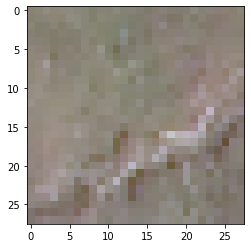

In [103]:
i = np.random.randint(0, X_test.shape[0])
print(f'y: {np.argmax(y_test.iloc[i])}, pred: {np.argmax(y_pred[i])}')
if np.argmax(y_test.iloc[i]) != np.argmax(y_pred[i]):
    print('error')
plt.imshow(X_test[i,:,:,0:3]);

In [ ]:
err_idx = []
for i in range(X_test.shape[0]):
  if np.argmax(y_test.iloc[i]) != np.argmax(y_pred[i]):
    err_idx.append(i)



In [ ]:
err_idx

In [118]:
%cd outputs

/drive/My Drive/Galvanize/DSI_Capstone_3/outputs


In [181]:
%cd ..

/drive/My Drive/Galvanize/DSI_Capstone_3/outputs


In [178]:
%mkdir road
# building
# barren_land
# trees
# grassland
# road
# water

In [182]:
!ls

barren_land  building  grassland  road	trees  water


In [193]:
err_lst = []
for j in err_idx:
  err_lst.append([f'{j}', labels_dict[np.argmax(y_test.iloc[j])], labels_dict[np.argmax(y_pred[j])]])
  # plt.imshow(X_test[j,:,:,0:3]);
  # plt.imsave(f'{labels_dict[np.argmax(y_test.iloc[j])]}/{labels_dict[np.argmax(y_pred[j])]}/image{j}.png',X_test[j,:,:,0:3]);
  # plt.show()
  # print()

In [198]:
err_arr = np.array(err_lst)
err_arr[err_arr[:,1]=='trees'].size

138

In [208]:
for i in ['building', 'barren_land', 'trees', 'grassland', 'road', 'water']:
  for j in ['building', 'barren_land', 'trees', 'grassland', 'road', 'water']:
    qty = err_arr[err_arr[:,1]==i][err_arr[err_arr[:,1]==i][:,2]==j].size
    if qty:
      print(f'y: {i} but pred: {j} = {qty}')
      print()

y: building but pred: road = 15

y: barren_land but pred: grassland = 468

y: barren_land but pred: road = 9

y: trees but pred: barren_land = 18

y: trees but pred: grassland = 120

y: grassland but pred: barren_land = 261

y: grassland but pred: trees = 6

y: grassland but pred: water = 3

y: road but pred: building = 93

y: road but pred: barren_land = 3



y: barren_land but pred: grassland = 468 \
y: grassland but pred: barren_land = 261 \
y: trees but pred: grassland = 120 \
y: road but pred: building = 93 \
y: trees but pred: barren_land = 18 \
y: building but pred: road = 15 \
y: barren_land but pred: road = 9 \
y: grassland but pred: trees = 6 \
y: grassland but pred: water = 3 \
y: road but pred: barren_land = 3